# ROC curve

In [1]:
import os
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import load_svmlight_file
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split

%matplotlib inline

## Load data

In [2]:
dataset_path = os.path.abspath('./data/breast-cancer_scale')

X, y = load_svmlight_file(dataset_path)

print(X.shape)
print(y.shape)

(683, 10)
(683,)


## Split data

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(X_train.shape)
print(X_test.shape)

(546, 10)
(137, 10)


## Classification

In [4]:
model = SVC(C=0.001, gamma=1.0, probability=True)

y_score = model.fit(X_train, y_train).decision_function(X_test)
y_prob = model.fit(X_train, y_train).predict_proba(X_test)

print('Labels: {}'.format(model.classes_))

Labels: [2. 4.]


## ROC and AUC

__Compute ROC curve and ROC area__

In [5]:
fpr1, tpr1, _ = roc_curve(y_test, y_score, pos_label=model.classes_[1])
roc_auc1 = auc(fpr1, tpr1)

fpr2, tpr2, _ = roc_curve(y_test, y_prob[:, 1], pos_label=model.classes_[1])
roc_auc2 = auc(fpr2, tpr2)

__Note:__ Positive label is `model.classes_[1]`

__Plot a ROC curve__

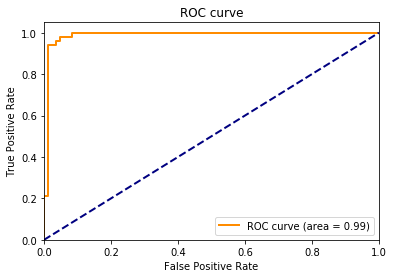

In [6]:
lw = 2

plt.plot(fpr1, tpr1, linewidth=lw, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc1)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")

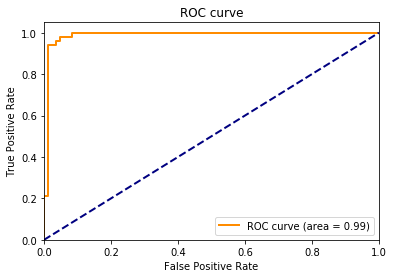

In [7]:
plt.plot(fpr2, tpr2, linewidth=lw, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc2)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")